In [1]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('salary_cleaned_data.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,"Range: ₹564K - ₹2,893K<span></span>",Introduction\nSoftware Developers at IBM are t...,3.9,IBM\n,Bengaluru,"Armonk, NY",10000+ employees,1911,Company - Public,...,564.0,2893.0,1728.5,0,109,1,0,0,0,1
1,Data Scientist,"Range: ₹565K - ₹2,964K<span></span>","At Amazon, we strive to be most customer-centr...",4.2,Amazon\n,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,565.0,2964.0,1764.5,0,26,1,0,1,1,1
2,Data Scientist,Range: ₹416K - ₹450K<span></span>,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate\n,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,...,416.0,450.0,433.0,0,25,1,0,0,0,0
3,Data Scientist,"Range: ₹715K - ₹1,532K<span></span>",HP is the worlds leading personal systems and ...,4.0,HP Inc.\n,Bengaluru,"Palo Alto, CA",10000+ employees,1939,Company - Public,...,715.0,1532.0,1123.5,0,81,0,0,0,0,1
4,Data Scientist,Range: ₹219K - ₹235K<span></span>,Provide analytical insights into emerging prob...,3.5,PayPal\n,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,...,219.0,235.0,227.0,0,22,1,0,0,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'same_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [6]:
df['Job Title'].value_counts()

Data Scientist                                    109
Data Analyst                                       71
Data Engineer                                      36
Senior Data Scientist                              30
Machine Learning Engineer                          14
                                                 ... 
Data Science Optimization                           1
Principal Data Engineer (Python)                    1
Data scientist/3+yrs/Pune                           1
Commodities Fundamental & Quantitative Analyst      1
CIB R&A - Data Analyst- Associate                   1
Name: Job Title, Length: 276, dtype: int64

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [8]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [9]:
df['job_simp'].value_counts()

data scientist    269
analyst           138
na                 83
data engineer      62
mle                27
manager            10
Name: job_simp, dtype: int64

In [10]:
df['seniority']=df['Job Title'].apply(seniority)

In [11]:
df['seniority'].value_counts()

na        468
senior    119
jr          2
Name: seniority, dtype: int64

In [12]:
df['desc_len']=df['Job Description'].apply(lambda x: len(str(x)))
df['desc_len']

0      7586
1      4616
2      2405
3      3030
4      1452
       ... 
584    2542
585    3321
586    1558
587    1622
588     883
Name: desc_len, Length: 589, dtype: int64

In [13]:
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [14]:
df['num_comp']

0      3
1      3
2      3
3      0
4      3
      ..
584    0
585    2
586    0
587    0
588    0
Name: num_comp, Length: 589, dtype: int64

In [15]:
df['Company Name']

0                                      IBM\n
1                                   Amazon\n
2                               Quanticate\n
3                                  HP Inc.\n
4                                   PayPal\n
                       ...                  
584                             String Bio\n
585                        GVK Biosciences\n
586                         Vinayak Software
587          Gametion Technologies Pvt Ltd\n
588    Roljobs Technology Services Pvt Ltd\n
Name: Company Name, Length: 589, dtype: object

In [16]:
df['Company Name']=df['Company Name'].apply(lambda x: x.replace('\n',''))

In [17]:
df['Company Name']

0                                      IBM
1                                   Amazon
2                               Quanticate
3                                  HP Inc.
4                                   PayPal
                      ...                 
584                             String Bio
585                        GVK Biosciences
586                       Vinayak Software
587          Gametion Technologies Pvt Ltd
588    Roljobs Technology Services Pvt Ltd
Name: Company Name, Length: 589, dtype: object

In [18]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,3.778947,1628.655348,629.458404,1144.726655,887.092530,0.0,34.319185,0.691002,0.037351,0.298812,0.188455,0.466893,2763.186757,1.027165
std,0.746533,756.976562,610.548452,982.250208,753.409626,0.0,53.168069,0.462473,0.189783,0.458126,0.391407,0.499327,1670.162043,1.366239
min,-1.000000,-1.000000,5.000000,6.000000,5.500000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3.500000,1876.000000,141.000000,345.000000,308.500000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1575.000000,0.000000
50%,3.900000,1995.000000,521.000000,970.000000,790.000000,0.0,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2465.000000,0.000000
75%,4.200000,2009.000000,888.000000,1730.000000,1362.500000,0.0,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3657.000000,3.000000
max,5.000000,2019.000000,5210.000000,5604.000000,5407.000000,0.0,352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10344.000000,3.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'same_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

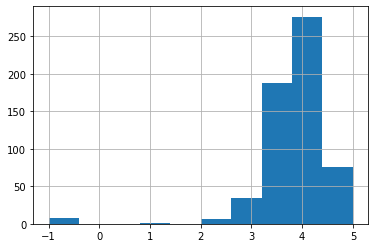

In [20]:
df.Rating.hist()

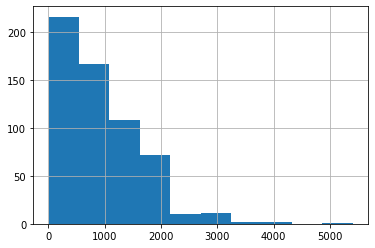

In [21]:
df.avg_salary.hist()

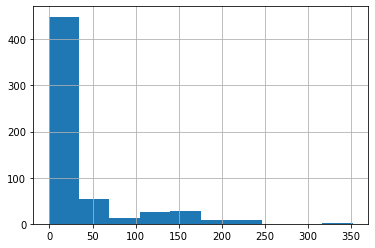

In [22]:
df.age.hist()

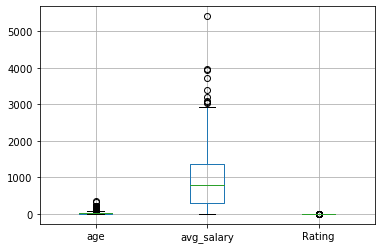

In [23]:
df.boxplot(column=['age','avg_salary','Rating'])

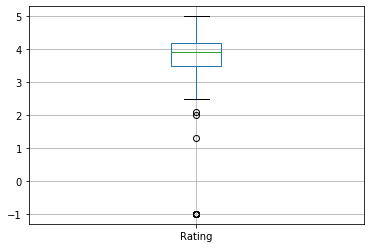

In [24]:
df.boxplot(column=['Rating'])

In [25]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,0.149916,0.048231
avg_salary,0.149916,1.000000,0.118104
Rating,0.048231,0.118104,1.000000


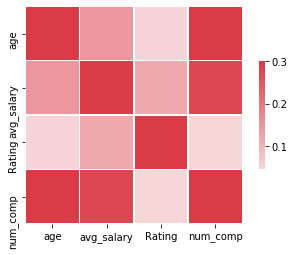

In [26]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','num_comp']].corr(),cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'same_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [28]:
df_cat=df[['Company Name','Location','Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority']]

graph for Company Name: total = 397


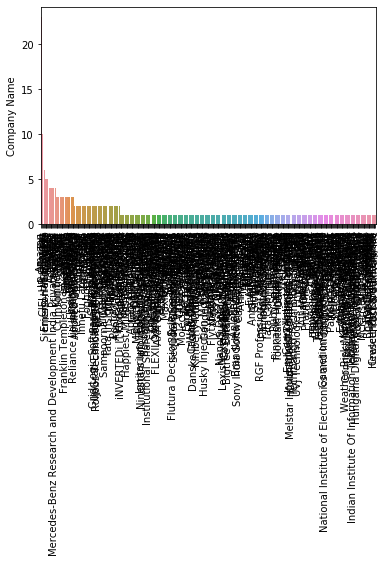

graph for Location: total = 35


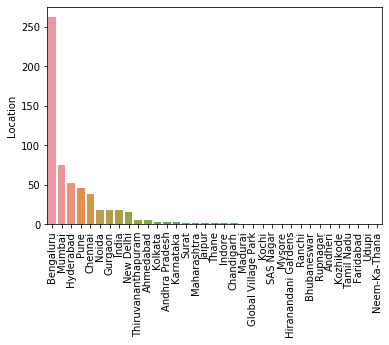

graph for Headquarters: total = 159


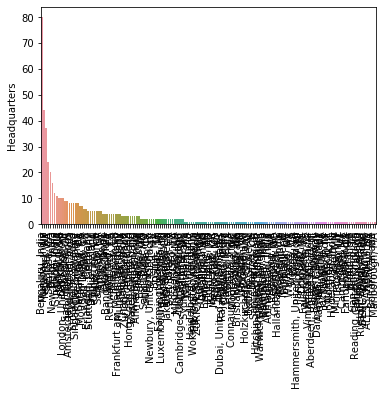

graph for Size: total = 9


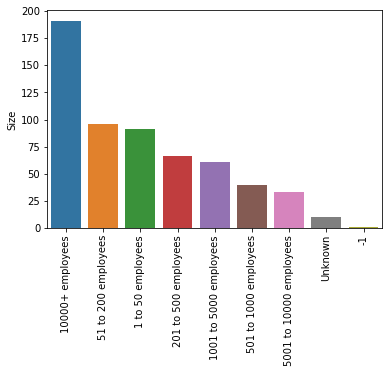

graph for Type of ownership: total = 11


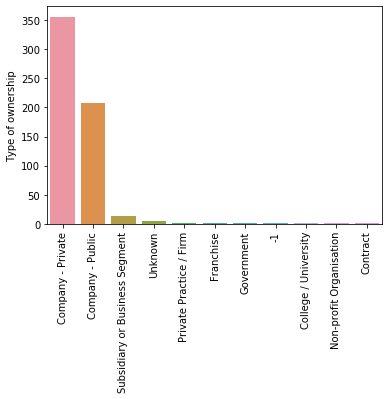

graph for Industry: total = 51


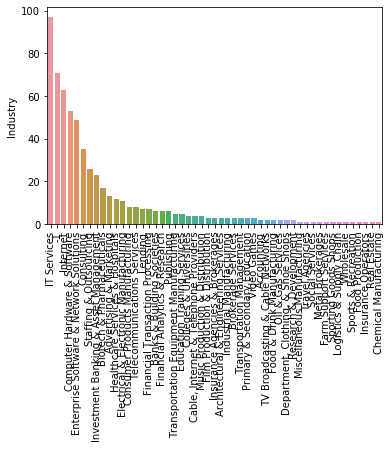

graph for Sector: total = 21


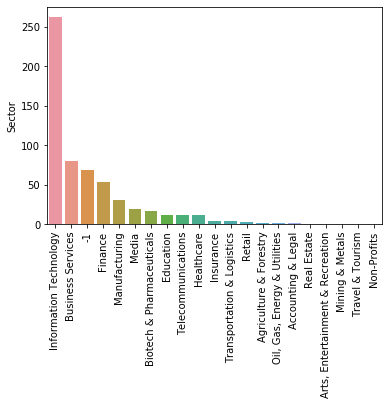

graph for Revenue: total = 12


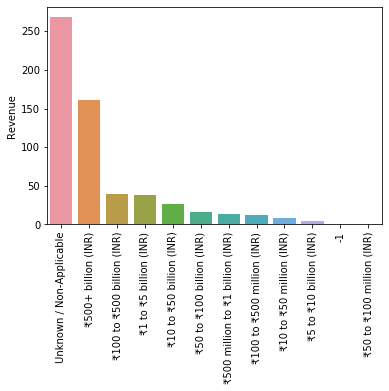

graph for python_yn: total = 2


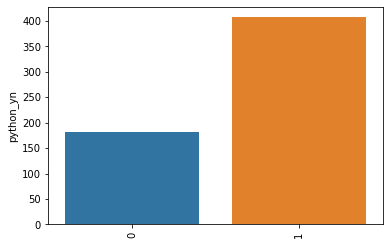

graph for rstudio_yn: total = 2


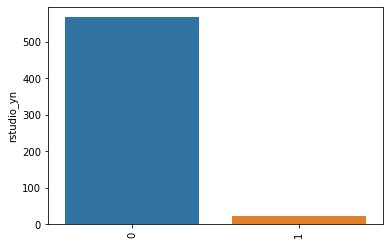

graph for spark_yn: total = 2


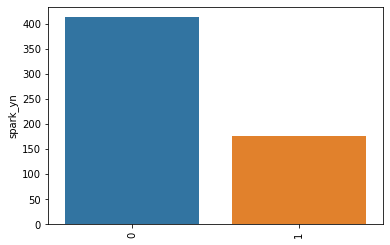

graph for aws_yn: total = 2


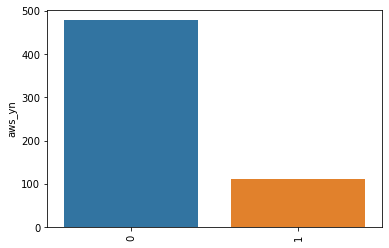

graph for excel_yn: total = 2


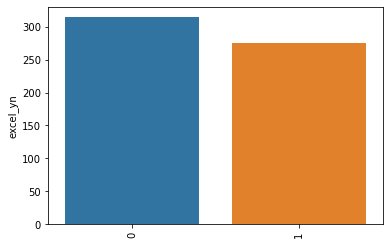

graph for job_simp: total = 6


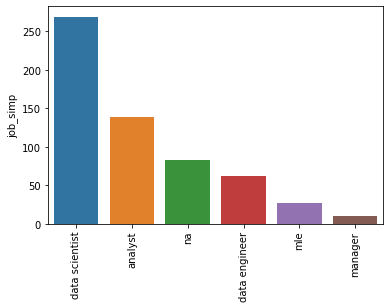

graph for seniority: total = 3


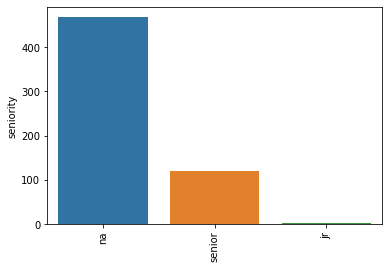

In [29]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Company Name: total = 20


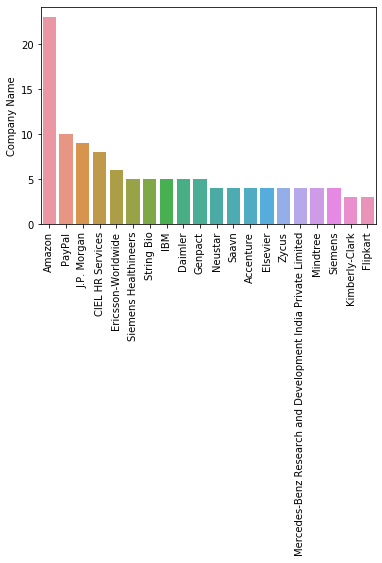

graph for Location: total = 20


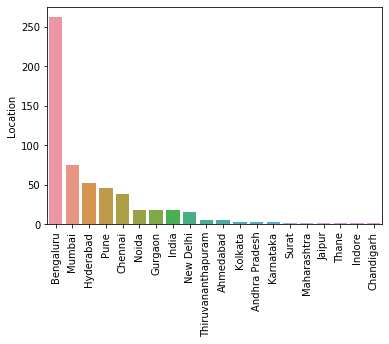

graph for Headquarters: total = 20


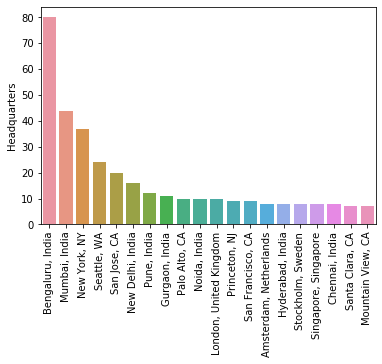

In [30]:
for i in df_cat[['Company Name','Location','Headquarters']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,788.239130
data engineer,951.362903
data scientist,854.219331
manager,749.750000
mle,1046.555556
na,1074.656627


In [32]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority             
analyst        na          747.206612
               senior     1080.294118
data engineer  na          895.711538
               senior     1240.750000
data scientist jr          749.750000
               na          819.447644
               senior      944.355263
manager        na          749.750000
mle            na         1023.560000
               senior     1334.000000
na             na         1079.188406
               senior     1052.321429

In [33]:
pd.pivot_table(df,index=['Location','job_simp'],values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
Location,job_simp,
Pune,data engineer,1593.833333
Bengaluru,mle,1429.750000
Neem-Ka-Thana,data scientist,1356.000000
Mumbai,data engineer,1275.600000
Bengaluru,na,1188.212766
...,...,...
Surat,analyst,21.500000
Thiruvananthapuram,data engineer,21.500000
Surat,data scientist,21.500000


In [34]:
 pd.pivot_table(df[df.job_simp=='data scientist'],index=['Location','job_simp'],values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
Location,job_simp,
Neem-Ka-Thana,data scientist,1356.000000
Karnataka,data scientist,1154.000000
Andhra Pradesh,data scientist,1074.666667
Bengaluru,data scientist,938.829167
Thane,data scientist,929.250000
Hyderabad,data scientist,923.729167
Chennai,data scientist,878.235294
Pune,data scientist,873.725000
Noida,data scientist,870.625000


In [35]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'same_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [36]:
df_pivots=df[['Rating','Industry', 'Sector', 'Revenue','num_comp','python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn','avg_salary']]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
         avg_salary
Rating             
 4.8    1328.944444
 4.2    1313.491935
 4.1    1138.822581
 4.9    1061.500000
 4.4     978.392857
 3.2     973.166667
 4.3     942.291667
 3.7     925.108108
 3.9     905.968254
 3.3     888.575000
 3.6     884.310811
 4.5     860.250000
 3.5     842.695122
 3.8     813.840000
 2.9     780.000000
 4.0     768.152174
 2.8     745.100000
 4.6     710.250000
 3.1     681.727273
 3.4     675.718750
 4.7     617.666667
-1.0     518.000000
 2.5     461.125000
 2.7     416.375000
 3.0     387.777778
 5.0     321.428571
 1.3      65.000000
 2.1      43.500000
 2.0      17.000000
Industry
                                          avg_salary
Industry                                            
Sports & Recreation                      3390.000000
Real Estate                              2078.500000
Sporting Goods Shops                     1885.000000
Insurance Agencies & Brokerages          1837.000000
Lending                                  1642.

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
-1,1.0,NaN
Unknown / Non-Applicable,93.0,175.0
₹1 to ₹5 billion (INR),5.0,33.0
₹10 to ₹50 billion (INR),8.0,18.0
₹10 to ₹50 million (INR),1.0,7.0
₹100 to ₹500 billion (INR),9.0,31.0
₹100 to ₹500 million (INR),NaN,12.0
₹5 to ₹10 billion (INR),NaN,5.0
₹50 to ₹100 billion (INR),4.0,12.0


In [39]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words=''.join(df['Job Description'].astype(str))

def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered=punctuation_stop(words)
text=''.join([ele for ele in words_filtered])
wc=WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df.to_csv('eda_data.csv',index=False)